In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier

In [2]:
product_info = pd.read_csv('Datasets/product_info.csv')

In [3]:
product_info

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [4]:
product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

## Checking for nulls

In [6]:
product_info.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [7]:
product_info.dropna(axis = 0, subset=['rating', 'reviews' , 'secondary_category'], inplace = True)

## Drop unwanted columns

In [11]:
product_info.drop(['new','out_of_stock','tertiary_category','variation_type','value_price_usd', 'variation_value', 'variation_desc','sale_price_usd','child_count', 'child_max_price', 'child_min_price', 'variation_desc'], axis = 1 , inplace = True )

In [13]:
product_info.shape

(8209, 16)

In [15]:
product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'ingredients', 'price_usd',
       'limited_edition', 'online_only', 'sephora_exclusive', 'highlights',
       'primary_category', 'secondary_category'],
      dtype='object')

### Checking Outliers 

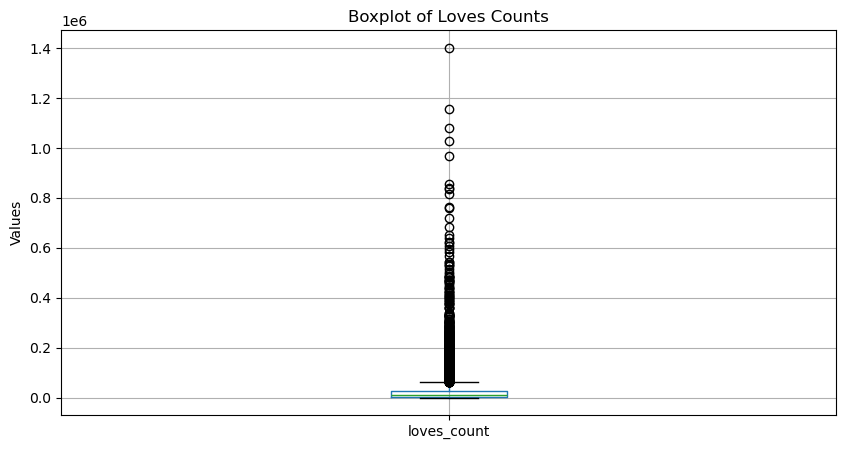

In [17]:
plt.figure(figsize=(10, 5))
product_info.boxplot(column =['loves_count'])
plt.title("Boxplot of Loves Counts")
plt.ylabel("Values")
plt.show()

In [19]:
#removing one row that has only Blush as its name
product_info = product_info[~product_info['product_name'].str.contains('Blush', case=False, na=False)]

In [21]:
# Replace 'Makeup' with 'Tools & Brushes' in primary_category where secondary_category is 'Brushes & Applicators'
product_info.loc[product_info['secondary_category'] == 'Brushes & Applicators', 'primary_category'] = \
product_info.loc[product_info['secondary_category'] == 'Brushes & Applicators', 'primary_category'].replace('Makeup', 'Tools & Brushes')

In [23]:
product_info.describe()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,online_only,sephora_exclusive
count,8067.000000,8.067000e+03,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000
mean,5421.890666,2.947507e+04,4.192363,446.267634,51.470327,0.060989,0.210983,0.279534
std,1712.799719,6.453343e+04,0.517542,1087.647625,53.758298,0.239325,0.408032,0.448798
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,5333.000000,4.115000e+03,3.978350,26.000000,25.000000,0.000000,0.000000,0.000000
50%,6156.000000,1.030300e+04,4.286900,122.000000,35.000000,0.000000,0.000000,0.000000
75%,6327.000000,2.729350e+04,4.528850,417.500000,58.000000,0.000000,0.000000,1.000000
max,8020.000000,1.153594e+06,5.000000,21281.000000,1900.000000,1.000000,1.000000,1.000000


In [32]:
product_info.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                   0
reviews                  0
size                  1484
ingredients              0
price_usd                0
limited_edition          0
online_only              0
sephora_exclusive        0
highlights               0
primary_category         0
secondary_category       0
dtype: int64

In [27]:
product_info.loc[:, 'highlights'] = product_info['highlights'].fillna("Not Mentioned")

In [34]:
product_info.loc[:, 'highlights'] = product_info['highlights'].fillna("Not applicable")

In [30]:
product_info.loc[:, 'ingredients'] = product_info['ingredients'].fillna("Not specify")

In [36]:
product_info.to_csv('product_info_clean.csv', index = False)

## Reviews Datasets EDA

In [20]:
reviews250 = pd.read_csv("Datasets/reviews_0-250.csv", dtype={'author_id': 'str'})

In [21]:
reviews250.shape

(602130, 19)

In [22]:
reviews250.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              117486
helpfulness                 331832
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                    999
review_title                167011
skin_tone                   106056
eye_color                   138488
skin_type                    74683
hair_color                  141081
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

## Drop unwanted columns

In [23]:
reviews250.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness',], axis = 1 , inplace = True )

In [24]:
reviews250.columns

Index(['author_id', 'rating', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'skin_type', 'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [25]:
reviews250.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [26]:
reviews250.dtypes

author_id                    object
rating                        int64
is_recommended              float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
skin_type                    object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [28]:
reviews250.head(10)

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,skin_type,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
5,42802569154,4,1.0,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6941883808,2,0.0,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7,27926227988,5,1.0,0,0,0,2023-03-19,I use this at night or while I’m putting makeu...,Works great,fairLight,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,7656791726,5,1.0,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
9,38727834382,5,1.0,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


### Repete the process for all the review files

In [29]:
reviews500 = pd.read_csv("Datasets/reviews_250-500.csv", dtype={'author_id': 'str'})

In [30]:
reviews500.shape

(206725, 19)

In [31]:
reviews500.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness',], axis = 1 , inplace = True )

In [32]:
reviews500.isnull().sum()

author_id                       0
rating                          0
is_recommended              25986
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                   172
review_title                59728
skin_tone                   26799
skin_type                   16749
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [33]:
reviews500.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [34]:
reviews500

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,skin_type,product_id,product_name,brand_name,price_usd
0,2190293206,2,0.0,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,combination,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,9113341005,5,1.0,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,normal,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,23866342710,1,0.0,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,combination,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,1328806527,1,0.0,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,combination,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,31262847082,5,1.0,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,combination,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206720,5113824372,4,1.0,27,4,23,2019-05-02,I haven’t used this long enough to report any ...,NaN,mediumTan,normal,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206721,5297430713,5,1.0,32,8,24,2019-04-27,"this serum is GREAT! Absorbs nicely, sits well...",NaN,medium,dry,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206722,2090479401,5,1.0,38,10,28,2019-04-22,I have been using this serum on my neck (day a...,Nice Collagen Serum!,fairLight,dry,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206723,10575410512,4,1.0,44,9,35,2019-04-19,I enjoyed this product more as a “primer” for ...,Great as a primer!,light,combination,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99


In [35]:
reviews750 = pd.read_csv("Datasets/reviews_500-750.csv", dtype={'author_id': 'str'})

In [36]:
reviews750.shape

(116262, 19)

In [37]:
reviews750.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness'], axis = 1 , inplace = True )

In [38]:
reviews750.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [39]:
reviews750.isnull().sum()

author_id                       0
rating                          0
is_recommended              11803
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                     0
review_title                33856
skin_tone                   15233
skin_type                    8886
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [40]:
reviews1250 = pd.read_csv("Datasets/reviews_750-1250.csv", dtype={'author_id': 'str'})

In [41]:
reviews1250.shape

(119317, 19)

In [42]:
reviews1250.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness'], axis = 1 , inplace = True )

In [43]:
reviews1250.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [44]:
reviews1250.isnull().sum()

author_id                       0
rating                          0
is_recommended               8896
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                     0
review_title                35467
skin_tone                   15244
skin_type                    7603
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [45]:
reviews5000 = pd.read_csv("Datasets/reviews_1250-end.csv", dtype={'author_id': 'str'})

In [46]:
reviews5000.shape

(49977, 19)

In [47]:
reviews5000.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness'], axis = 1 , inplace = True )

In [48]:
reviews5000.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [49]:
reviews5000.isnull().sum()

author_id                       0
rating                          0
is_recommended               3817
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                     0
review_title                14319
skin_tone                    7198
skin_type                    3629
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [50]:
reviews250.to_csv('reviews250.csv', index = True)

## joining all the reviews

In [52]:
reviews1 = reviews250.merge(reviews500, how= 'outer')

In [53]:
reviews1.shape

(807684, 15)

In [54]:
reviews2 = reviews1.merge(reviews750, how = 'outer')

In [55]:
reviews3 = reviews2.merge(reviews1250, how = 'outer')

In [56]:
reviews4 = reviews3.merge(reviews5000, how = 'outer')

In [57]:
reviews4.shape

(1092967, 15)

In [58]:
reviews4.dtypes

author_id                    object
rating                        int64
is_recommended              float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
skin_type                    object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [59]:
reviews4.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                      0
review_title                309210
skin_tone                   170499
skin_type                   111518
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [60]:
#replacing nulls
reviews4['skin_tone'] = reviews4['skin_tone'].fillna("Unknown")
reviews4['skin_type'] = reviews4['skin_type'].fillna("Unknown")

In [61]:
reviews4['review_title'] = reviews4['review_title'].fillna("None")

In [62]:
# Convert the 'submission_time' column to datetime
reviews4['submission_time'] = pd.to_datetime(reviews4['submission_time'])


In [63]:
reviews4['submission_time'] = reviews4['submission_time'].astype('datetime64[ns]')

In [64]:
reviews4['submission_time']

0         2019-03-08
1         2021-02-27
2         2019-09-13
3         2019-08-10
4         2017-08-14
             ...    
1092962   2014-04-30
1092963   2015-03-11
1092964   2015-06-30
1092965   2011-08-01
1092966   2012-03-23
Name: submission_time, Length: 1092967, dtype: datetime64[ns]

In [65]:
reviews4.dtypes

author_id                           object
rating                               int64
is_recommended                     float64
total_feedback_count                 int64
total_neg_feedback_count             int64
total_pos_feedback_count             int64
submission_time             datetime64[ns]
review_text                         object
review_title                        object
skin_tone                           object
skin_type                           object
product_id                          object
product_name                        object
brand_name                          object
price_usd                          float64
dtype: object

In [66]:
reviews4['combined_text'] = reviews4['review_title'].fillna('') + ' ' + reviews4['review_text'].fillna('').astype(str)

In [67]:
reviews4.to_csv('reviewsfinal.csv', index = True)

## Extracting all common words for analysis

In [69]:
def process_text_column(col):
    all_text = " ".join(col)
    cleaned_text = re.sub(r'[^a-zA-Z\sÄô]', '', all_text.lower())
    tokens = cleaned_text.split()
    stop_words = set([  "i", "me", "my", "myself", "ive", "im", "we", "our", "ours", "ourselves", "you", "your", "yours",
        "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers","even","try","recommend",
        "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves","doesnt","didnt","get","received",
        "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are","amazing","also","definitely",
        "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does","really","good","one","would",
        "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until","love","like","using",
        "while", "of", "at", "by", "for", "with", "about", "against", "between", "into","nice","doesn't","little","works"
        "through", "during", "before", "after", "above", "below", "to", "from", "up", "down","much","well","great",
        "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here","products","product",
        "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more","dont","much",
        "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so","feel","feels",
        "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","use","used",
    ])
    filtered_words = [word for word in tokens if word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(40)

In [70]:
most_com_words = process_text_column(reviews4['combined_text'])

In [71]:
reviews4.columns

Index(['author_id', 'rating', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'skin_type', 'product_id', 'product_name', 'brand_name', 'price_usd',
       'combined_text'],
      dtype='object')

In [72]:
# finding the top 40 common words
print("Most Popular Words Across All Reviews:")
for word, count in most_com_words:
    print(f"{word}: {count}")

Most Popular Words Across All Reviews:
skin: 1346538
face: 353485
none: 313292
dry: 239199
moisturizer: 190293
cream: 182216
makeup: 174115
day: 136514
sensitive: 132503
oily: 131876
serum: 131512
acne: 129727
cleanser: 125895
time: 124252
night: 123896
first: 123229
soft: 120087
smell: 118306
smooth: 111026
feeling: 109129
eye: 109026
works: 106857
mask: 104414
tried: 103874
best: 103675
super: 103282
texture: 103162
oil: 99569
see: 98663
long: 98513
way: 97228
makes: 96663
scent: 92240
difference: 91547
make: 89930
smells: 88518
price: 85083
look: 84503
morning: 84371
light: 84206


In [73]:
reviews4.to_csv('reviewsfinal.csv', index = False)

In [74]:
reviews4.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                      0
review_title                     0
skin_tone                        0
skin_type                        0
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
combined_text                    0
dtype: int64

In [75]:
most_com_words = pd.DataFrame(most_com_words)

In [76]:
most_com_words.to_csv("most_com_words.csv", index=False)

In [77]:
# Process the ingredients column to count the most common ingredients
def process_ingredients_column(col):
    all_ingredients = []
    for row in col:
        if pd.isna(row):
            continue
        ingredients = re.sub(r"[\[\]]", "", row).split(",")
        ingredients = [ingredient.strip() for ingredient in ingredients]
        all_ingredients.extend(ingredients)
    ingredient_counts = Counter(all_ingredients)
    return ingredient_counts

ingredient_counts = process_ingredients_column(product_info['ingredients'])
most_common_ingredients = ingredient_counts.most_common(20)

In [78]:
# finding the top 20 common ingredients
print("Most Common Ingredients:", most_common_ingredients)

Most Common Ingredients: [('Glycerin', 3989), ('Phenoxyethanol', 3717), ('Caprylyl Glycol', 2600), ('Tocopherol', 2587), ('Limonene', 2420), ('Ethylhexylglycerin', 2255), ('Linalool', 2194), ('Butylene Glycol', 2183), ('Silica', 2172), ('Dimethicone', 2110), ('Citric Acid', 2108), ('Potassium Sorbate', 1751), ('Sodium Benzoate', 1639), ('Caprylic/Capric Triglyceride', 1630), ('Citronellol', 1578), ('Tocopheryl Acetate', 1578), ('Propanediol', 1533), ('Geraniol', 1508), ('Sodium Hyaluronate', 1469), ('Citral', 1285)]


In [79]:
# Create a DataFrame with expanded ingredients for each product
expanded_ingredients = []
for index, row in product_info.iterrows():
    if pd.isna(row['ingredients']):
        continue
    ingredients = re.sub(r"[\[\]]", "", row['ingredients']).split(",")
    for ingredient in ingredients:
        expanded_ingredients.append({
            "product_id": row["product_id"],
            "primary_category": row["primary_category"],
            "secondary_category": row["secondary_category"],
            "tertiary_category": row["tertiary_category"],
            "ingredient": ingredient.strip()
        })

ingredients_df = pd.DataFrame(expanded_ingredients)

ingredients_df.head()

,product_id,primary_category,secondary_category,tertiary_category,ingredient
0,P473671,Fragrance,Value & Gift Sets,Perfume Gift Sets,'Capri Eau de Parfum:'
1,P473671,Fragrance,Value & Gift Sets,Perfume Gift Sets,'Alcohol Denat. (SD Alcohol 39C)
2,P473671,Fragrance,Value & Gift Sets,Perfume Gift Sets,Parfum (Fragrance) D-Limonene
3,P473671,Fragrance,Value & Gift Sets,Perfume Gift Sets,Linalool
4,P473671,Fragrance,Value & Gift Sets,Perfume Gift Sets,Benzyl Salicylate


In [80]:
# Group ingredients by primary category
grouped_ingredients = ingredients_df.groupby(["primary_category", "ingredient"]).size().reset_index(name="count")
grouped_ingredients = grouped_ingredients.sort_values(by=["primary_category", "count"], ascending=[True, False])
grouped_ingredients.head(20)

,primary_category,ingredient,count
980,Bath & Body,Glycerin,225
2156,Bath & Body,Tocopherol,140
1269,Bath & Body,Limonene,138
1625,Bath & Body,Phenoxyethanol,136
640,Bath & Body,Citric Acid,114
1271,Bath & Body,Linalool,112
566,Bath & Body,Cetearyl Alcohol,105
495,Bath & Body,Caprylic/Capric Triglyceride,104
889,Bath & Body,Ethylhexylglycerin,99
646,Bath & Body,Citronellol,93


In [81]:
grouped_ingredients.to_csv("ingredients_by_category.csv", index=False)